In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np
import seaborn as sns
import collections

In [665]:
df_raw = pd.read_csv("/Users/eier/Documents/Norconsult/TrainAndValid.csv",
                     parse_dates = ['saledate'],
                     low_memory = False)

## Data vizualisation and statistics

Text(0.5, 1.0, 'Saleprice distribution')

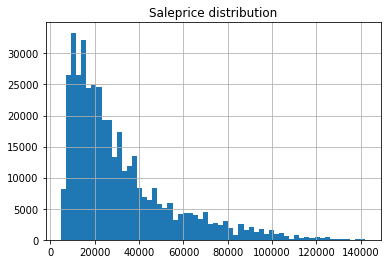

In [648]:
df_raw['SalePrice'].hist(bins = 60)
plt.title('Saleprice distribution')

In [9]:
x_plot = x
x_plot["SalePrice"] = y

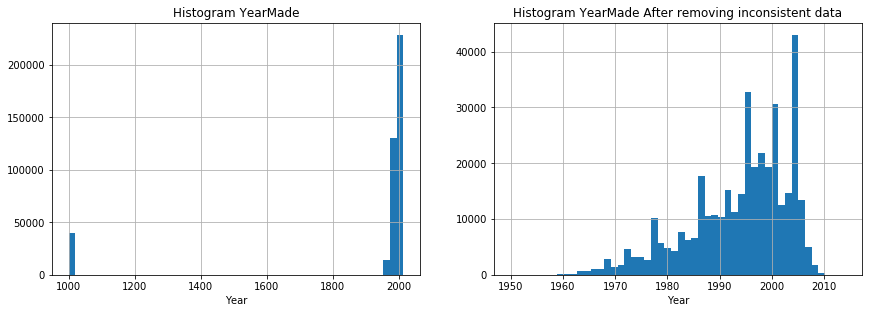

In [666]:
plt.subplot(1, 2, 1)
df_raw['YearMade'].hist(bins=50)
plt.title('Histogram YearMade')
plt.xlabel('Year')

df_temp = df_raw
df_temp.loc[df_temp.YearMade<1950, 'YearMade'] = np.nan
plt.subplot(1, 2, 2)
df_temp['YearMade'].hist(bins=50)
plt.title('Histogram YearMade After removing inconsistent data')
plt.xlabel('Year')
plt.subplots_adjust(top=1, right=2)


In [9]:
features_viz = ['SalePrice',
                'SalesID', 
                'MachineID',
                'ModelID',
                'auctioneerID',
                'YearMade',
                'saledate',
                'fiBaseModel',
                'fiSecondaryDesc',
                'state',
                'ProductGroup',
                'Enclosure']

x_viz = feature_engineering(features_viz, df_raw)

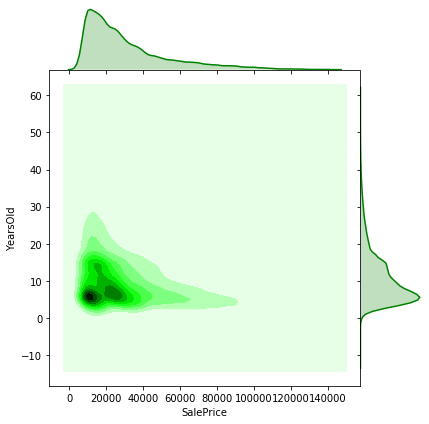

In [45]:
plot = sns.jointplot("SalePrice", "YearsOld", data=x_viz,
               kind="kde", space=0, color="g")

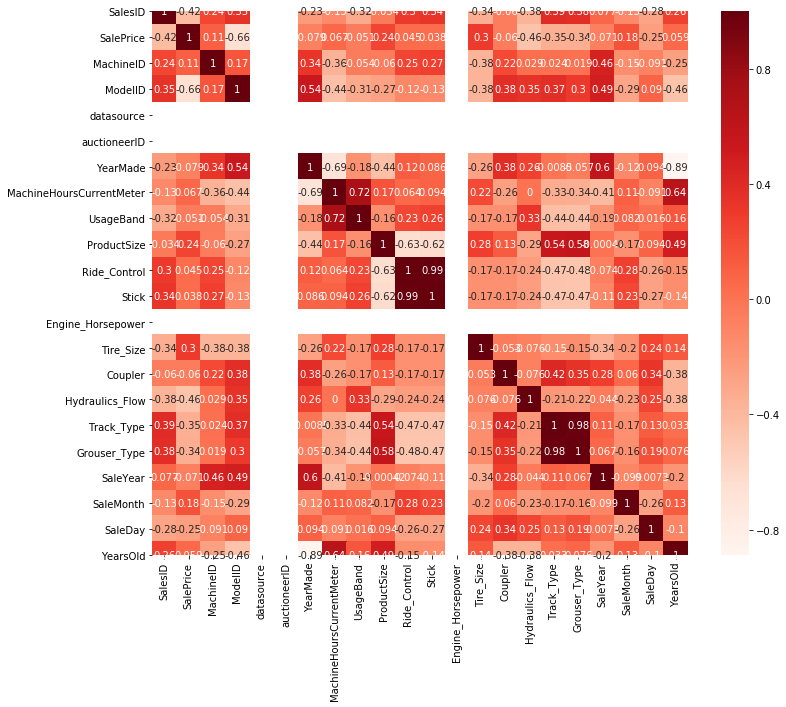

<Figure size 432x288 with 0 Axes>

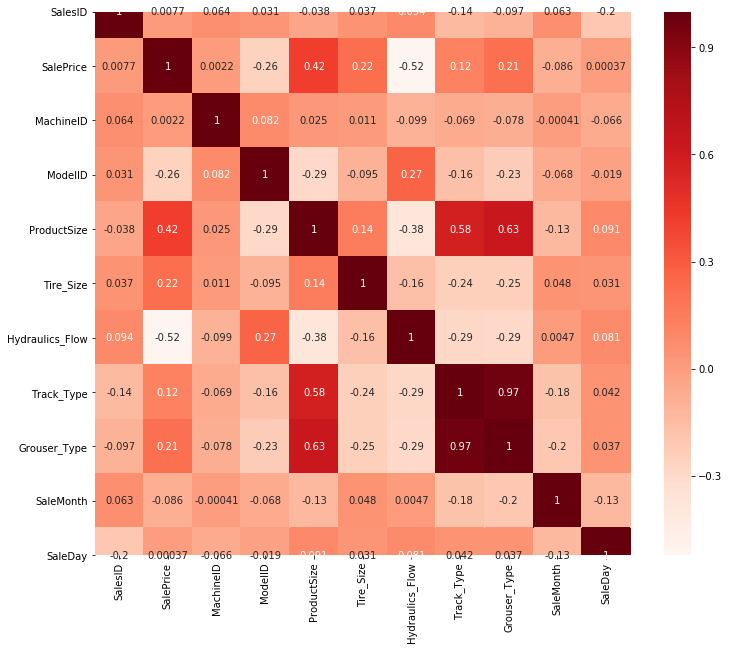

<Figure size 432x288 with 0 Axes>

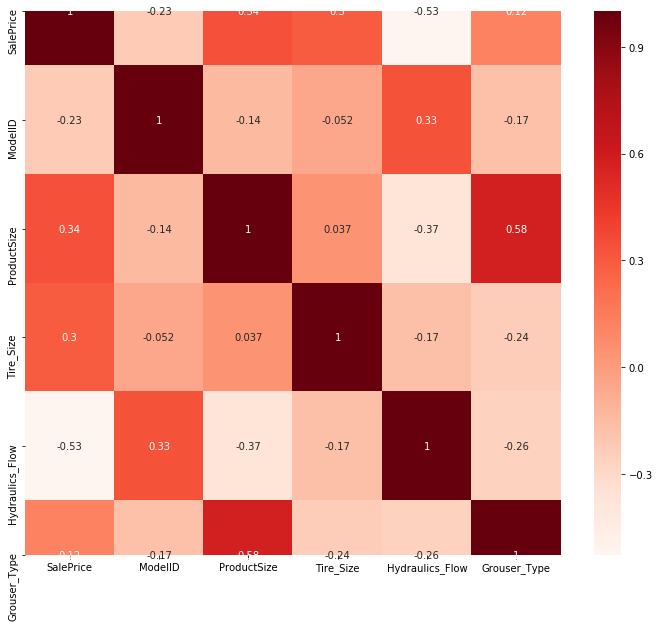

<Figure size 432x288 with 0 Axes>

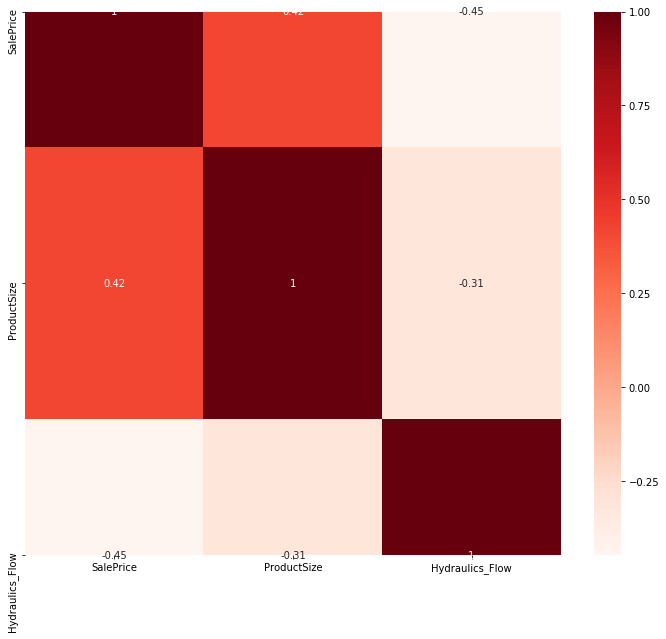

<Figure size 432x288 with 0 Axes>

In [647]:

dataframe = df_raw
dataframe = feature_engineering(df_raw.columns, dataframe)

dataframe = label_encoding_logical(df_raw.columns, dataframe)

correlation_targets = [0.10,0.20,0.30,0.40]
df_lengths = [20,100,200, len(dataframe)]

for i in range(len(correlation_targets)):
    #Selects a subset of rows from the input dataframe
    temporary_df = dataframe[0:df_lengths[i]]
    
    # Plots a correlation matrix for the given features
    plt.figure(figsize=(12,10))
    cor = temporary_df.corr(method='spearman')
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()
    
    
    #Correlation with output variable
    cor_target = abs(cor["SalePrice"])
    #Selecting highly correlated features above the target
    relevant_features = cor_target[cor_target>correlation_targets[i]]
    relevant_features = list(relevant_features.index)
    plt.subplots_adjust(top=1, right=2)
    
    # Passes the given features above the correlation target for the next iteration
    dataframe = dataframe[relevant_features]

## Missing values

In [440]:
df_available_raw = (1-df_raw.isnull().sum()/len(df_raw)).sort_values()

df_raw = df_raw.replace(['None or Unspecified', '#NAME?', 'Unspecified', ' ', 'None'], np.nan)

#data_available = (1-df.isnull().sum()/len(df)).sort_values()

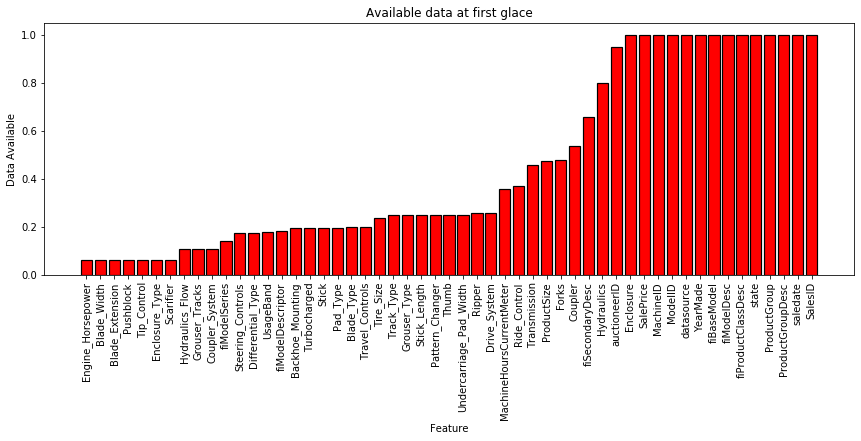

In [38]:

x_values = list(range(len(df_available_raw)))
plt.bar(x_values, list(df_available_raw.values), orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, list(df_available_raw.index), rotation='vertical')
plt.ylabel('Data Available'); plt.xlabel('Feature'); plt.title('Available data at first glace');
plt.subplots_adjust(top=1, right=2)

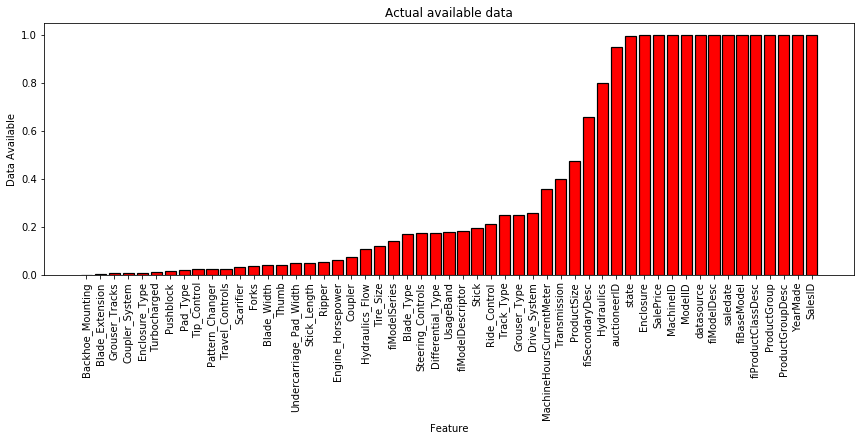

In [12]:
x_values = list(range(len(data_available)))
plt.bar(x_values, list(data_available.values), orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, list(data_available.index), rotation='vertical')
plt.ylabel('Data Available'); plt.xlabel('Feature'); plt.title('Actual available data');
plt.subplots_adjust(top=1, right=2)

## Baseline Model, preliminary test

In [48]:
features_bm = ['MachineID',
              'ModelID',
              'auctioneerID',
              'YearMade',
              'saledate',
              'fiBaseModel',
              'fiSecondaryDesc',
              'state',
              'ProductGroup',
              'Enclosure']


#### Case 1: Use label encoding where it makes sense and one hot encoding for rest, use normal test train split

In [367]:
x = feature_engineering(features_bm, df_raw)
final_features_bm = x.columns # for plotting importance

x = label_encoding_logical(features_bm, x)
x = one_hot_encoding(x)
x_train_ohe, x_val_ohe, y_train_ohe, y_val_ohe = train_test_split(x, y, test_size=0.2, random_state=17)
y = df_raw["SalePrice"]

rf_ohe = RandomForestRegressor(n_estimators = 10, random_state = 17,criterion = 'mse' , n_jobs = -1)

y = df_raw["SalePrice"]

In [ ]:
rf_ohe.fit(x_train_ohe, y_train_ohe)

In [ ]:
predictions_ohe = rf_ohe.predict(x_val_ohe)
rmse_bm_ohe = rmse(y_val_ohe.values, predictions_ohe)

#### Case 2: Use label encoding for the all the labels(faster), use normal test train split

In [371]:
x = feature_engineering(features_bm, df_raw)
x_le = label_encoding(x)
x_train_le, x_val_le, y_train_le, y_val_le = train_test_split(x_le, y, test_size=0.2, random_state=17)

In [372]:
rf_le = RandomForestRegressor(n_estimators = 10, random_state = 17,criterion = 'mse' , n_jobs = -1)

In [373]:
rf_le.fit(x_train_le, y_train_le)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=17, verbose=0,
                      warm_start=False)

In [84]:
predictions_le = rf_le.predict(x_val_le)
rmse_bm_le = rmse(y_val_le.values, predictions_le)

#### Baseline model result and feature importances

In [643]:
print('Basemodel with one hot encoding rmse : ' + str(rmse_bm_ohe))
print('Basemodel with label encoding rmse   : ' + str(rmse_bm_le))
print('We can see that the model with one hot encoding produces a more accurate model')

Basemodel with one hot encoding rmse : 7814.706431090236
Basemodel with label encoding rmse   : 7923.544733410638
We can see that the model with one hot encoding produces a more accurate model


In [133]:
#Calculate feature importance for the models
#When we use one hot encoding we sum up alle the imporances for each feature
final_features_bm = x_train_le.columns
importances_ohe = list(rf_ohe.feature_importances_)
feature_importances_ohe = [(feature, round(importance, 4)) for feature, importance in zip(x_train_ohe.columns, importances_ohe)]
feature_importances_ohe = sorted(feature_importances, key = lambda x: x[1], reverse = True)

importance_dict_ohe = {}
for feature in final_features_bm: 
    importance = feature_importance(feature, feature_importances_ohe)
    importance_dict_ohe[feature] = importance
    
importances_le =list(rf_le.feature_importances_)


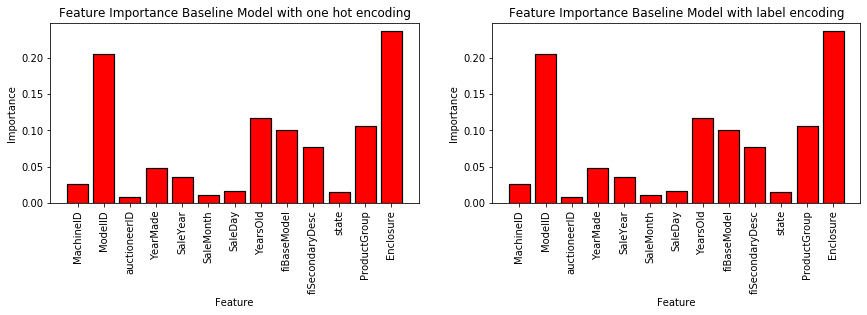

In [129]:
plt.subplot(1, 2, 1)
#Plot importances
x_values = list(range(len(list(importance_dict_ohe.values()))))
plt.bar(x_values, list(importance_dict_ohe.values()), orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, list(importance_dict_ohe.keys()), rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importance Baseline Model with one hot encoding');

plt.subplot(1, 2, 2)
#Plot importances
x_values = list(range(len(importances_le)))
plt.bar(x_values, importances_le, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, list(x_train_le.columns), rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importance Baseline Model with label encoding');

plt.subplots_adjust(top=0.75, right=2)

## Train and validation set

#### Make a traning and validation set, since the data is skewed we want data from both early and late, therefore, sort data based on saleyear, and split it into two part and extract 20% data from both parts


In [276]:
x_train, x_val, y_train, y_val = test_train(df)

In [302]:
def test_train(df):
    
    df = df.sort_values(by=['YearMade'])
    
    df1 = df_dummy[:int(len(df_dummy)/2)]
    y1 = df1['SalePrice']
    x1 = df1.drop('SalePrice', axis = 1)
    
    df2 = df_dummy[int(len(df_dummy)/2):]
    y2 = df2['SalePrice']
    x2 = df2.drop('SalePrice', axis = 1)
    
    x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(x1, y1, test_size=0.2, random_state=17)
    x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(x2, y2, test_size=0.2, random_state=17)
    
    x_train = pd.concat([x_train_1, x_train_2], ignore_index=True, sort =False)
    y_train = pd.concat([y_train_1, y_train_2], ignore_index=True, sort =False)
    x_val = pd.concat([x_val_1, x_val_2], ignore_index=True, sort =False)
    y_val = pd.concat([y_val_1, y_val_2], ignore_index=True, sort =False)
    
    return x_train, x_val, y_train, y_val

## Feature engineering

#### feature_engineering: handle numerical values, and for data with small percentage missing data fill out with most common,median or mean

In [386]:
def feature_engineering(features, df):
    
    x = df.filter(features)
        
    if 'SalesID' in features:
        x['auctioneerID'] =  x['auctioneerID'].fillna(x['auctioneerID'].value_counts().index[0])

    if 'MachineID' in features: 
        x['auctioneerID'] =  x['auctioneerID'].fillna(x['auctioneerID'].value_counts().index[0])

    if 'auctioneerID' in features: 
        x['auctioneerID'] =  x['auctioneerID'].fillna(x['auctioneerID'].value_counts().index[0])

    if 'fiSecondaryDesc' in features:
        x['fiSecondaryDesc'] =  x['fiSecondaryDesc'].fillna(x['fiSecondaryDesc'].value_counts().index[0])

    if 'state' in features:
        x['state'] =  x['state'].fillna(x['state'].value_counts().index[0])

    if 'Enclosure' in features:
        x['Enclosure'] =  x['Enclosure'].fillna(x['Enclosure'].value_counts().index[0])

    if 'Hydraulics' in features: 
        x['Hydraulics'] = x['Hydraulics'].fillna(x['Hydraulics'].value_counts().index[0])

    if 'Tire_Size' in features: 
        x['Tire_Size'] = x['Tire_Size'].str.replace(r'\D+','')
        x['Tire_Size'] = x['Tire_Size'].replace('', np.nan)
        x["Tire_Size"] = x["Tire_Size"].astype(float)
        x['Tire_Size'] = x['Tire_Size'].fillna(0)

    if 'saledate' in features:

        x_date_raw = x['saledate'].astype(str) #Convert type 'time' to string
        x_date = x_date_raw.str.split("-",n = 3, expand = True) #Split raw string formate into three parts
        x["SaleYear"] = x_date[0].astype(int)
        x["SaleMonth"] = x_date[1].astype(int)
        x["SaleDay"] = x_date[2].astype(int)
        x = x.drop('saledate', axis = 1)

    if 'YearMade' in features:

        x.loc[df.YearMade<1950, 'YearMade'] = np.nan
        x["YearMade"] = x['YearMade'].fillna(df["YearMade"].median())

        if 'saledate' in features:
            x["YearsOld"] = x['SaleYear'] - x["YearMade"] + x['SaleMonth']/12

    if 'MachineHoursCurrentMeter' in features:
        x.loc[df.MachineHoursCurrentMeter == 0, 'MachineHoursCurrentMeter'] = np.nan
        x['MachineHoursCurrentMeter'] = df['MachineHoursCurrentMeter'].fillna(x['MachineHoursCurrentMeter'].mean())


    return x
            
    

#### Label encode features which makes sense to order numerical, either data with order or data with only two possible values

In [592]:
def label_encoding_logical(features, x):
        
    if 'ProductSize' in features: 
        sizes_PS = {np.nan:0,
                'Mini':1,
                'Compact':1,
                'Small':2,
                'Medium':3,
                'Large / Medium':4,
                'Large':5}

        x['ProductSize'] = x['ProductSize'].map(sizes_PS).values
        
    if 'Ride_Control' in features: 
        x.loc[:,'Ride_Control'] = pd.factorize(x['Ride_Control'])[0].reshape(-1,1)
        
    if 'Stick' in features:
        x.loc[:,'Stick'] = pd.factorize(x['Stick'])[0].reshape(-1,1)
        
    if 'Coupler' in features:
        x.loc[:,'Coupler'] = pd.factorize(x['Coupler'])[0].reshape(-1,1)
        
    if 'Track_Type' in features: 
        x.loc[:,'Track_Type'] = pd.factorize(x['Track_Type'])[0].reshape(-1,1)
        
    if 'Ride_Control' in features: 
        x.loc[:,'Ride_Control'] = pd.factorize(x['Ride_Control'])[0].reshape(-1,1)
        
    if 'Stick' in features:
        x.loc[:,'Stick'] = pd.factorize(x['Stick'])[0].reshape(-1,1)   
        
    if 'Hydraulics_Flow' in features:
        x.loc[:,'Hydraulics_Flow'] = pd.factorize(x['Hydraulics_Flow'])[0].reshape(-1,1)
        
    if 'UsageBand' in features: 
        sizes_UB = {np.nan:0, 'Low':1, 'Medium':2, 'High':3}
        x['UsageBand'] = x['UsageBand'].map(sizes_UB).values
          
    if 'Engine_Horsepower' in features:
        x.loc[:,'Engine_Horsepower'] = pd.factorize(x['Engine_Horsepower'])[0].reshape(-1,1)
        
    if 'Grouser_Type' in features: 
        x.loc[:,'Grouser_Type'] = pd.factorize(x['Grouser_Type'])[0].reshape(-1,1)
    
    return x
    

#### One hot encoding, split into numerical and categorical and one hot encode only the categorical part

In [70]:
def one_hot_encoding(df):
    x_numerical = df.select_dtypes(['number'])
    x_categorical = df.select_dtypes(['object'])
    x_categorical_ohe = pd.get_dummies(x_categorical, prefix_sep='_', drop_first=True)
    x = pd.concat([x_numerical, x_categorical_ohe], axis = 1)
    return x
    

#### Label encode all the features

In [140]:
def label_encoding(df):
    
    x_categorical = df.select_dtypes(['object'])
    x_numerical = df.select_dtypes(['number'])
    
    for categorical_feature in x_categorical: 
        x_categorical.loc[:,categorical_feature] = pd.factorize(x_categorical[categorical_feature])[0].reshape(-1,1)
    
    x = pd.concat([x_numerical, x_categorical], axis = 1)
    return x
    

#### Metrics

In [502]:
def rmse(train, predictions):
    return np.sqrt(((predictions - train) ** 2).mean())

#### Function to calculate feature importance after one hot encoding

In [69]:
def feature_importance(feature, feature_importance_list): 
    #Deal with the fact that some features names are splitted with _, e.g "Drive_System"
    feature = feature.split("_")[0]
    importance_count = 0
    for importance in feature_importance_list:
        string = importance[0].split("_")
        if string[0] == feature:
            importance_count += float(importance[1])
    return importance_count

## Random forest

#### Final model for random forest

In [424]:
features_rf = ['MachineID',
            'ModelID',
            'auctioneerID',
            'YearMade',
            'saledate',
            'fiBaseModel',
            'fiSecondaryDesc',
            'state',
            'ProductGroup',
            'Enclosure',
            'Hydraulics',
            'ProductSize',
            'Transmission',
            'MachineHoursCurrentMeter',
            'Drive_System',
            'Ride_Control',
            'Stick',
            'fiModelDescriptor',  
            'Steering_Controls', 
            'fiModelSeries', 
            'Tire_Size', 
            'Hydraulics_Flow',
            'Ripper']

### Training with label and one hot encoding

In [609]:
x_train, x_val, y_train, y_val = test_train(df_raw)

x_train = feature_engineering(features_rf, x_train)
x_val = feature_engineering(features_rf, x_val)

len_xtrain = len(x_train)
len_xval = len(x_val)

x_temp = pd.concat([x_train, x_val], ignore_index=True, sort =False)
x_temp = label_encoding_logical(features_rf, x_temp)
x_temp = one_hot_encoding(x_temp)

x_train = x_temp[:len_xtrain]
x_val = x_temp[len_xtrain:]

rf = RandomForestRegressor(n_estimators = 50, random_state = 17,
                           criterion = 'mse')

### Training with label encoding

In [635]:
x_train, x_val, y_train, y_val = test_train(df_raw)
x_train = feature_engineering(features_rf, x_train)
x_val = feature_engineering(features_rf, x_val)
len_xtrain = len(x_train)

x_temp = pd.concat([x_train, x_val], ignore_index=True, sort =False)
x_temp = label_encoding(x_temp)

x_train = x_temp[:len_xtrain]
x_val = x_temp[len_xtrain:]
rf = RandomForestRegressor(n_estimators = 50, random_state = 17,
                           criterion = 'mse', max_depth = 66, min_samples_split = 11, min_samples_leaf=3 )


#### Train random forest 

In [636]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=66,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=11,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=17, verbose=0,
                      warm_start=False)

In [637]:
predictions = rf.predict(x_val)

In [639]:
rmse(y_val.values, predictions)

7395.4324134211365

In [640]:
sale_map_rf = dict(zip(y_val, predictions))

In [641]:
sale_map_rf = collections.OrderedDict(sorted(sale_map_rf.items()))

([], <a list of 0 Text xticklabel objects>)

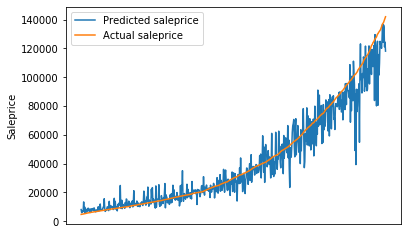

In [642]:
plt.plot(list(sale_map_rf.values()), label = 'Predicted saleprice')
plt.plot(list(sale_map_rf.keys()), label = 'Actual saleprice')
plt.legend()
plt.ylabel('Saleprice')
plt.xticks([])

In [617]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [618]:
importance_dict = {}
for feature in features_rf: 
    importance = feature_importance(feature, feature_importances)
    importance_dict[feature] = importance

In [619]:
import operator
importance_dict_sorted = sorted(importance_dict.items(), key=operator.itemgetter(1))

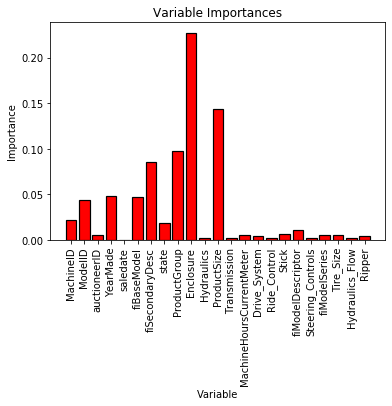

In [620]:
x_values = list(range(len(list(importance_dict.values()))))

plt.bar(x_values, list(importance_dict.values()), orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

plt.xticks(x_values, list(importance_dict.keys()), rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Bayesian Hyperparameter Optimization

In [434]:
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import forest_minimize
from skopt.plots import plot_convergence
from skopt.plots import plot_histogram, plot_objective_2D


In [456]:
features_bho = ['MachineID',
                'ModelID',
                'auctioneerID',
                'YearMade',
                'saledate',
                'fiBaseModel',
                'fiSecondaryDesc',
                'state',
                'ProductGroup',
                'Enclosure',
                'Hydraulics',
                'ProductSize',
                'Transmission',
                'MachineHoursCurrentMeter',
                'Drive_System',
                'Ride_Control',
                'Stick',
                'fiModelDescriptor',  
                'Steering_Controls', 
                'fiModelSeries', 
                'Tire_Size', 
                'Hydraulics_Flow',
                'Ripper']

y_bho = df_raw["SalePrice"]
x_bho = feature_engineering(features_bho, df_raw)


In [458]:
x_bho= label_encoding(x_bho)

In [459]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 17)

In [461]:
space  = [Integer(10, 100, name='max_depth'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

#Denfine objective function
@use_named_args(space)
def objective(**params):
    rf.set_params(**params)

    return -np.mean(cross_val_score(rf, x_bho, y_bho, cv=5, n_jobs=-1))

In [462]:
res_gp = forest_minimize(objective, space, n_calls=50, random_state=17, acq_func='EI')

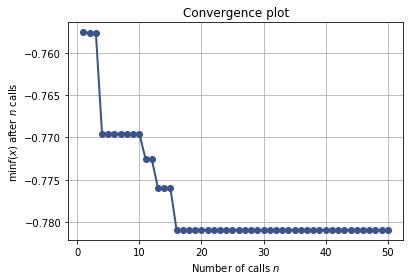

In [463]:
plot_convergence(res_gp)

In [464]:
print('Optimal max_depth         : ' + str(res_gp.x[0]))
print('Optimal min_samples_split : ' + str(res_gp.x[1]))
print('Optimal min_samples_leaf  : ' + str(res_gp.x[2]))

Optimal max_depth         : 66
Optimal min_samples_split : 11
Optimal min_samples_leaf  : 3


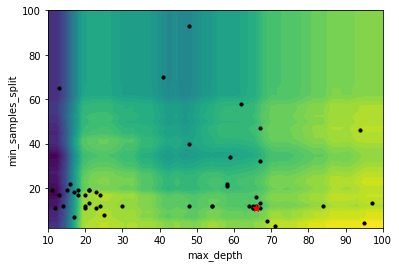

In [465]:
#Plot search space for bayesian hyperparameter optimization
fig = plot_objective_2D(result=res_gp,
                        dimension_name1='max_depth',
                        dimension_name2='min_samples_split',
                        levels=50)

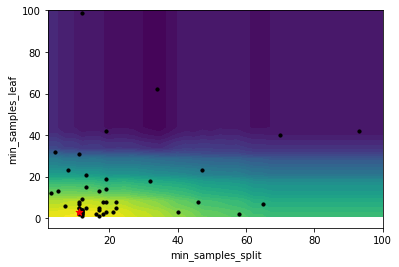

In [466]:
#Plot search space for bayesian hyperparameter optimization
from skopt.plots import plot_histogram, plot_objective_2D
fig = plot_objective_2D(result=res_gp,
                        dimension_name1='min_samples_split',
                        dimension_name2='min_samples_leaf',
                        levels=50)